[View in Colaboratory](https://colab.research.google.com/github/danielpiccoli1/notebooks-danielp/blob/master/SVC_1_1_ml_classificacao_iris.ipynb)

# Classificação

In [0]:
import os
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def figsize(x, y):
    # Get current size
    fig_size = plt.rcParams["figure.figsize"]
    # Prints: [8.0, 6.0]
    fig_size[0] = x
    fig_size[1] = y
    plt.rcParams["figure.figsize"] = fig_size

In [0]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            (X, y)]

In [0]:
def plot_classification(name, clf, X, y, cmap):
    score = clf.score(X, y)

    h = 0.2
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))    
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]    

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Greys)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(name + " - Score %.2f" % score)

In [0]:
def plot_multi_class(name, clf, X, y, cmap=plt.cm.PRGn):
    score = clf.score(X, y)

    h = 0.2
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))    
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Greys)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(name + " - Score %.2f" % score)

Considerando os seguintes dados, gerados aleatoriamente:

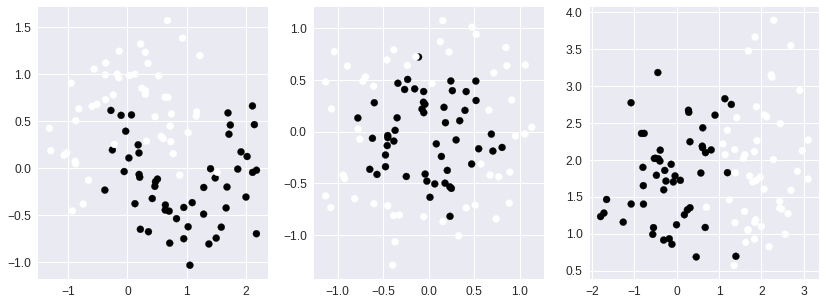

In [0]:
figsize(14, 5)
for i, (X, y) in enumerate(datasets):
    plt.subplot(1,3,i+1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Greys)

Gostaríamos de criar um **classificador** capaz de apropriadamente **separar** duas classes e corretamente classificar novas entradas.

## Solução usando Máquinas de suporte vetorial (SVM)

In [0]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
X, y = datasets[0]
svc.fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

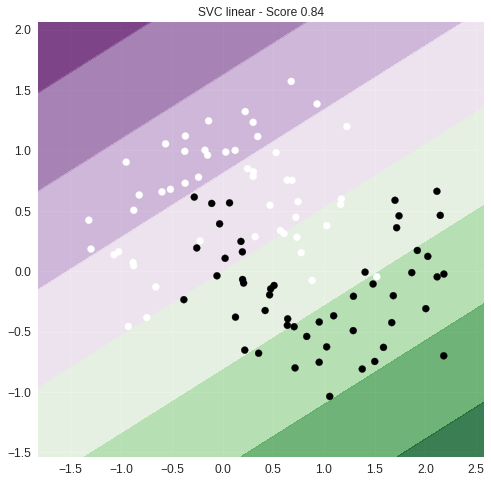

In [0]:
figsize(8,8)
plot_classification('SVC linear', svc, X, y, plt.cm.PRGn)

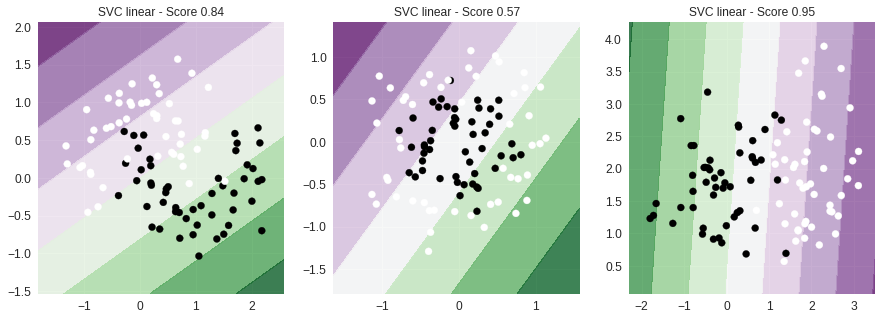

In [0]:
figsize(15, 5)
for dataset_idx, (X, y) in enumerate(datasets):
    plt.subplot(1, 3, dataset_idx+1)
    svc.fit(X, y)
    plot_classification('SVC linear', svc, X, y, plt.cm.PRGn)

In [0]:
svc = SVC(kernel='poly', degree=3)

for dataset_idx, (X, y) in enumerate(datasets):
    plt.subplot(1, 3, dataset_idx+1)
    svc.fit(X, y) 
    plot_classification('SVC Polynomial', svc, X, y, plt.cm.PRGn)

In [0]:
svc = SVC(kernel='rbf')

for dataset_idx, (X, y) in enumerate(datasets):
    plt.subplot(1, 3, dataset_idx+1)
    svc.fit(X, y) 
    plot_classification('SVC RBF', svc, X, y, plt.cm.PRGn)

# Exercício *Iris*

- 50 amostras de 3 espécies diferentes de íris (150 amostras no total)
- Medidas: comprimento da sépala, largura da sépala, comprimento da pétala, largura da pétala

![](https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/e43b96424ad781f57d492ce36351693aad01902a/images/03_iris.png)

## Aprendizado de máquina no conjunto de dados da íris

Enquadrado como um problema de **aprendizado supervisionado**: Preveja as espécies de uma íris usando as suas medidas. 

- Famoso conjunto de dados para aprendizado de máquina porque a previsão é **fácil**
- Saiba mais sobre o conjunto de dados da íris: [UCI Machine Learning Repository] (http://archive.ics.uci.edu/ml/datasets/Iris)
- Cada linha é uma **observação** (também conhecida como: exemplo, amostra, sample)
- Cada coluna é uma **feature** (também conhecido como: preditor, atributo, variável independente)
- Cada valor que estamos prevendo é a resposta (também conhecida como: target, outcome, label, dependent variable)
- A classificação é um aprendizado supervisionado no qual a resposta é categórica
- Regressão é a aprendizagem supervisionada em que a resposta é ordenada e contínua

In [0]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

In [0]:
print(type(iris))
print(iris.DESCR)

<class 'sklearn.utils.Bunch'>
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Mis

In [0]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [0]:
print(type(iris.data))
print(type(iris.target))
print(iris.data.shape)
print(iris.target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)


In [0]:
X = iris.data[:,2:] # Features
y = iris.target # Labels

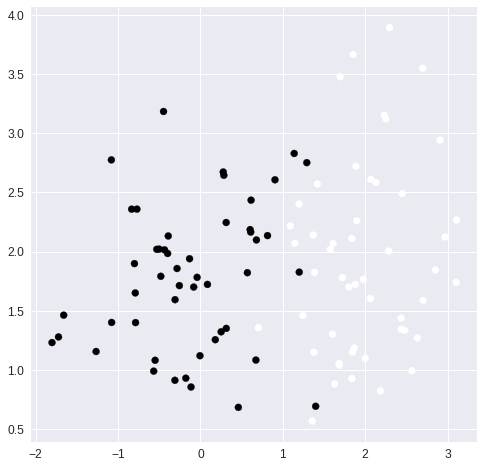

In [0]:
figsize(8,8)
plt.scatter(X[:,0], X[:,1], c=y)

In [0]:
figsize(8,8)
plt.scatter(X[:,2], X[:,3], c=y)

IndexError: ignored

## Exercício:

Crie um classificador capaz de separar as 3 classes de plantas.

In [0]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


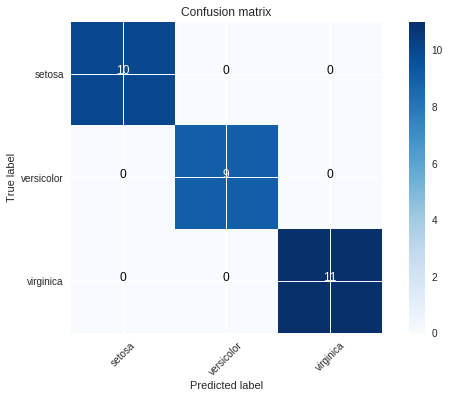

In [0]:
import numpy as np

import sklearn.svm as svm
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

np.random.seed(42)

iris = load_iris()

X = iris.data
y = iris.target


train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2)  #test size pega 20% do total  x é sempre feature e y é sempre labels
target_name =  iris.target_names

#classifier_linear_regression = LinearRegression(fit_intercept=True, normalize=False)
#classifier_linear_regression.fit(train_features, train_labels)

#classifier_linear_regression.predict(test_features[:1])
#classifier_linear_regression.score(test_features, test_labels)

classifier_svc = svm.SVC()
classifier_svc.fit(train_features, train_labels)

svm_labels = classifier_svc.predict(test_features)
classifier_svc.score(test_features, test_labels)

confusion_mat = confusion_matrix(test_labels, svm_labels)

plot_confusion_matrix(confusion_mat, target_name)






Apresente as métricas de validação Matriz de Confusão, Precision/Recall, F1 e ROC para este classificador.